# TP 5 Réseaux de neurones - Multi classification et Propagation en avant
Dans ce TP, nous aimerions faire une classification multiclasse. Pour ce faire, nous allons comparer entre une classification utilisant la regression logistique, et une classification en utilisant les réseaux de neurones.

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP5_IARN/data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

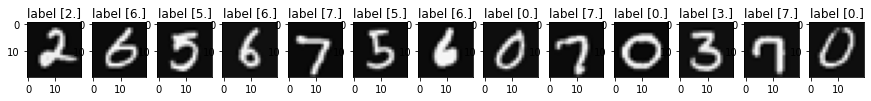

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

# Partie 1 : régression logistique
Dans cette partie, nous aimerions utiliser la régression logistique pour classifier nos images

Rappelons que la régression logistique nous donne la probabilité d'appartenance (oui ou non) à la classe 1 (elle permet une classification binaire).

Pour étendre la régression logistique à une multi-classification, nous allons utiliser une stratégie 1 contre tous.

Nous paramètres $\theta$ seront donc une matrice avec un nombre de lignes égale au nombre de classes, et avec un nombre de colones égale au nombre decaractéristiques (chaque ligne de la matrice $\theta$ correspond aux paramètres d'un classifieur.

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));

# fonction qui retourne l'expression matricielle de la fonction hypothèse de la regression linéaire
def h(X, theta):
  return np.matmul(X, theta)

# fonction qui applique la sigmoid sur la fonction hypothèse de la regression linéaire
# le résultat retourner n'est autres que la fonction hypothèse de la regression logistique
def h_sigmoid(X, theta):
  return Sigmoid(h(X, theta))

# calcule du coût
def computeCostReg(X, y, theta, param_lambda):
  m = len(y) # nombre d'exemples
  n = X.shape[1] # nombre de features
  return ((-1/m) * np.sum(y*np.log(h_sigmoid(X, theta)) + (1-y)*np.log(1-h_sigmoid(X, theta)))) + (param_lambda/(2*m))*np.sum(np.square(theta[1:n+1]))

# gradient
def grad(X, y, theta, param_lambda):
  m = len(X)
  return np.dot((1/m), np.matmul(X.T, (h_sigmoid(X, theta) - y))) + np.dot(param_lambda/m, theta)

# descete du gradient
def lrCostFunction (X, y, theta, alpha, MaxIter,lambda_):
    # dans cette fonction vous devez appliquer la regression logistique avec tout ce que ceci implique
    # calcul du coût, minimisation du coût avec descente du gradient, et retour des paramètres theta pour une classe
    cout = [] # garder le cout à chaque itération
    parametres = [] # garder la valeur de theta à chaque itération
    for i in range(MaxIter):
     cout.append(computeCostReg(X, y, theta, lambda_))
     parametres.append(theta)
     theta  = theta  - np.dot(alpha, grad(X, y, theta, lambda_))
    return theta, cout, parametres


In [ ]:
def predictOneVsAll (all_theta, X):
    # ici en utilisant les paramètres calculés par la régression logisitique,
    # nous aiemrions retourner les etiquettes predites

    # Ici chaque classifieur retournera de probabilité, il faudra choisir
    # la probabilité maximale
    # de tous les classifieurs d'une exemple donné
    # répeter pour tous les exmemples
    temp_matrice = np.zeros((len(X), len(all_theta)))
    for i in range(len(X)):
      for j in range(len(all_theta)):
        temp_matrice[i, j] = h_sigmoid(X[i, :], all_theta[j, :])
    y_pred = np.zeros((len(X), 1))
    for i in range(len(y_pred)):
      y_pred[i, 0] = np.argmax(temp_matrice[i, :])
    return y_pred

In [ ]:
classes= np.unique(y)
number_classes=classes.shape[0]
all_theta = np.zeros((number_classes, X.shape[1]));
all_theta.shape

(10, 401)

In [ ]:
MaxIter= 10000
lambda_= 0.1
alpha = 0.01
# initial_theta pour chaque classifieur
initial_theta=np.zeros((X.shape[1], 1));
for i in range (number_classes):
     # appel pour chaque classifieur
     theta, cout, parametres = lrCostFunction(X,(y==classes[i]).astype(int),initial_theta,alpha, MaxIter,lambda_);
     all_theta[i,:]=theta.reshape(401, )

In [ ]:
y_pred = predictOneVsAll(all_theta, X)

# Qualité du classifieur RL

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
precision = np.mean(y==y_pred)*100
precision

89.92

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
notre classifieur est bon
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

# Partie 2 : Réseaux de neurones
Pour cette partie, nous choisissons un réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [ ]:
# poids de la couche 1
W1 = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP5_IARN/W1.csv', delimiter=',', dtype=float)
W1.shape

(25, 401)

In [ ]:
# poids de la couche 2
W2 = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP5_IARN/W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [ ]:
input_layer_size  = 400;
hidden_layer_size = 25;
num_labels = 10;

**Prédiction**

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [ ]:
# appliquer une propagation vers l'avant
def predict (W1, W2, X):
    #----------------- Couche 1 -------------------------------
    b1 = np.random.randn(1, len(W1)) # initialiser de façon aléatoire le biais
    # calcule du z1
    z1 = np.zeros((len(X), len(W1)))
    z1 = X.dot(W1.T) + b1
    a1 = Sigmoid(z1) # appliquer la sigmoid (activation de z1)
    intercept = np.ones((len(X), 1))
    a1 = np.column_stack((intercept, a1))

    #----------------- Couche 2 -------------------------------
    b2 = np.random.randn(1, len(W2)) # initialiser de façon aléatoire le biais
    # calcule du z2
    z2 = np.zeros((len(X), len(W2)))
    z2 = a1.dot(W2.T) + b2
    a2 = Sigmoid(z2) # appliquer la sigmoid (activation de z2)

    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie
    y_pred = np.zeros((len(X), 1))
    for i in range(a2.shape[0]):
      y_pred[i, 0] = np.argmax(a2[i, :]) +1
      y_pred = np.where(y_pred==10, 0, y_pred)
    return y_pred

In [ ]:
y_pred=predict(W1, W2, X)
precision = np.mean(y==y_pred)*100
precision

92.56

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

# création d'un objet de la classe LogisticRegression
model = LogisticRegression()
# entrainement
model.fit(X[:, 1:401], y.ravel())
# prédiction
y_predict = model.predict(X[:, 1:401])
precision = np.mean(y==y_predict)*100
precision

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


10.0

In [ ]:
# exactitude
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_predict))

0.9626


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
notre modèle a une performance égale à 96% ( c'est-à-dire que sur ces données d'entrainement elle arrive à donner de bonnes réponses 96% du temps)
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

